In [2]:
# 导入Python的数据处理库pandas, 相当于python里的excel
import pandas as pd

#导入python高级数据可视化库seaborn
import seaborn as sns

# 导入python绘图matplotlib
import matplotlib.pyplot as plt

"""
各个字段的含义：
    CRIM     犯罪率
    ZN       住宅用地所占比例
    INDUS    城镇中非商业用地所占比例
    CHAS     是否处于查尔斯河边
    NOX      一氧化碳浓度
    RM       住宅房间数
    AGE      1940年以前建成的业主自住单位的占比
    DIS      距离波士顿5个商业中心的加权平均距离
    RAD      距离高速公路的便利指数
    TAX      不动产权税
    PTRATIO  学生/教师比例
    B        黑人比例
    LSTAT    低收入阶层占比
    MEDV     房价中位数
"""

# 读取数据集
df = pd.read_csv('./boston_house_price.csv', encoding='utf-8')
# 展示前五行
df.head()



,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
#统计信息
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

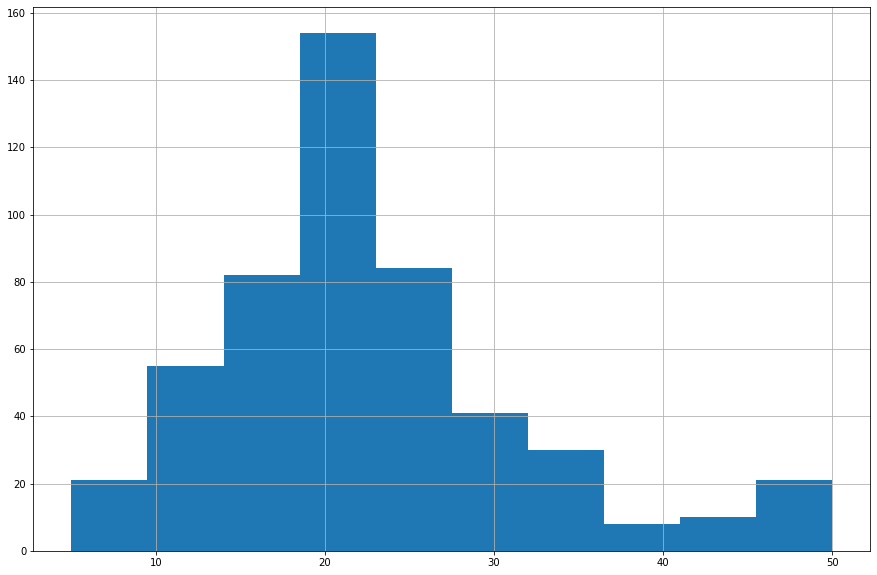

In [4]:
#绘制房价的直方图
df['medv'].hist()

E:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='medv'>

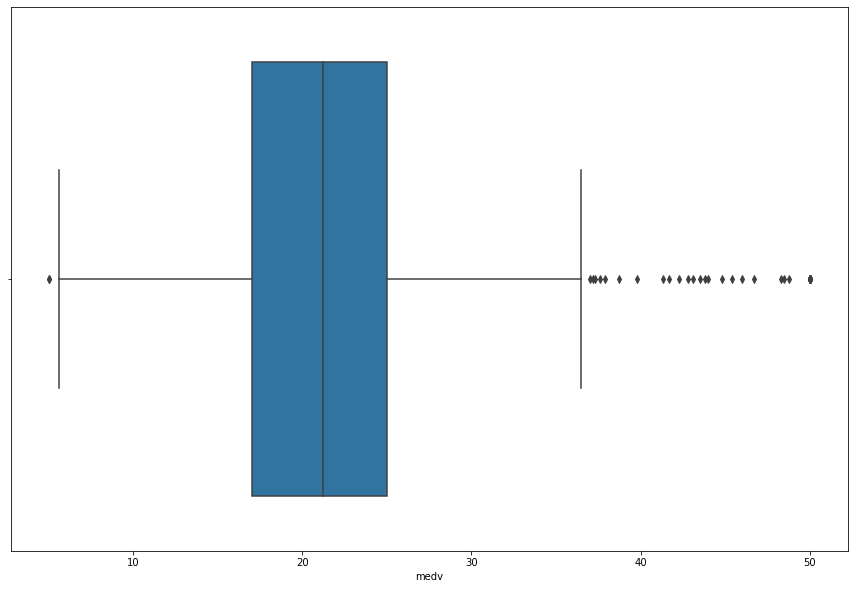

In [5]:
#绘制房价的箱线图
sns.boxplot(df['medv'])

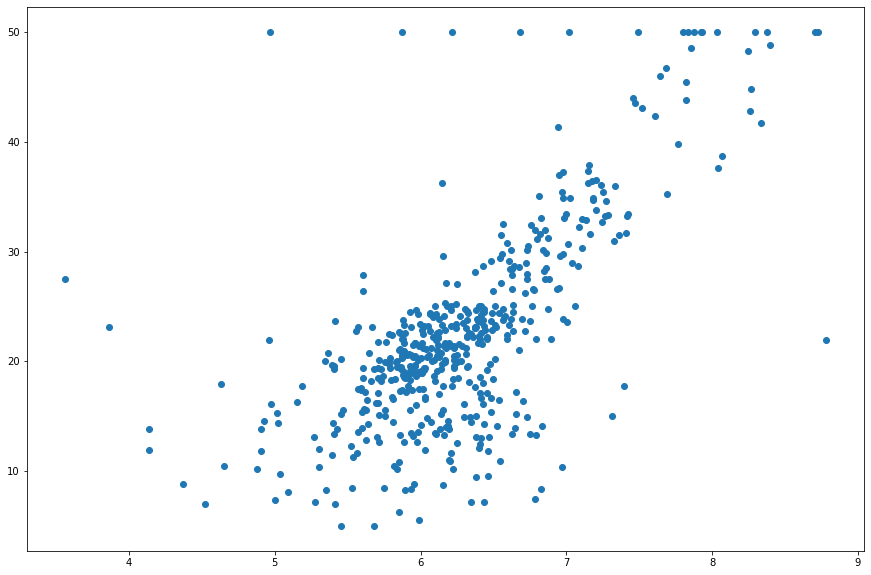

In [6]:
#绘制房间数的散点图
plt.scatter(df['rm'],df['medv'])

In [7]:
def box_plot_outliers(df,s):
    q1,q3=df[s].quantile(0.25),df[s].quantile(0.75)
    iqr=q3-q1
    low,up=q1-1.5*iqr,q3+1.5*iqr
    df=df[(df[s]>up)|(df[s]<low)]
    return df

df_filter=box_plot_outliers(df,'rm')
df_filter.mean()

crim         5.994001
zn          15.400000
indus        9.715667
chas         0.133333
nox          0.556303
rm           7.100533
age         74.393333
dis          3.033943
rad         10.700000
tax        397.166667
ptratio     17.163333
b          352.374667
lstat       10.098333
medv        37.420000
dtype: float64

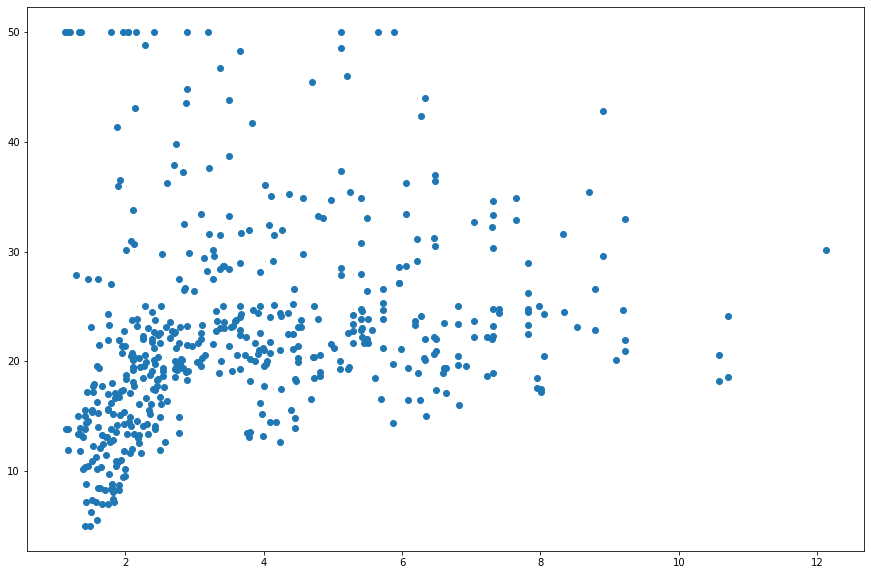

In [8]:
#输出距离和房间的散点图
plt.scatter(df['dis'],df['medv'])

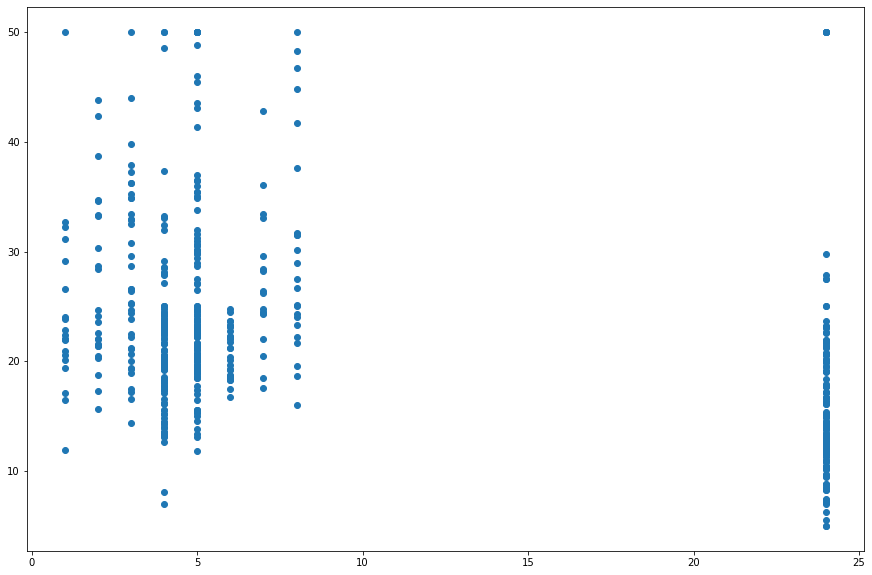

In [9]:
#输出rad和房间的散点图
plt.scatter(df['rad'],df['medv'])

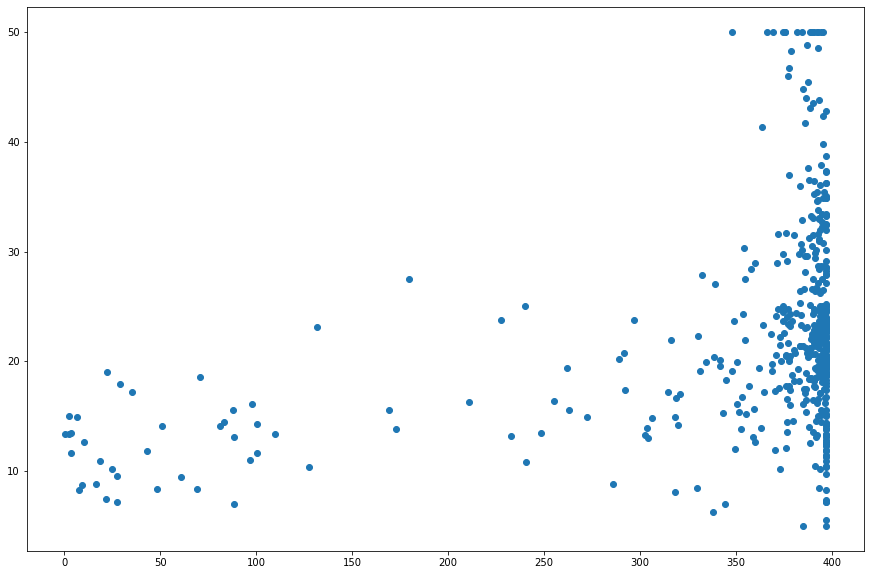

In [10]:
#输出B和房间的散点图
plt.scatter(df['b'],df['medv'])

In [11]:
#两个变量之间的相关系数
df.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


array([[<AxesSubplot:title={'center':'crim'}>,
        <AxesSubplot:title={'center':'zn'}>,
        <AxesSubplot:title={'center':'indus'}>,
        <AxesSubplot:title={'center':'chas'}>],
       [<AxesSubplot:title={'center':'nox'}>,
        <AxesSubplot:title={'center':'rm'}>,
        <AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'dis'}>],
       [<AxesSubplot:title={'center':'rad'}>,
        <AxesSubplot:title={'center':'tax'}>,
        <AxesSubplot:title={'center':'ptratio'}>,
        <AxesSubplot:title={'center':'b'}>],
       [<AxesSubplot:title={'center':'lstat'}>,
        <AxesSubplot:title={'center':'medv'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

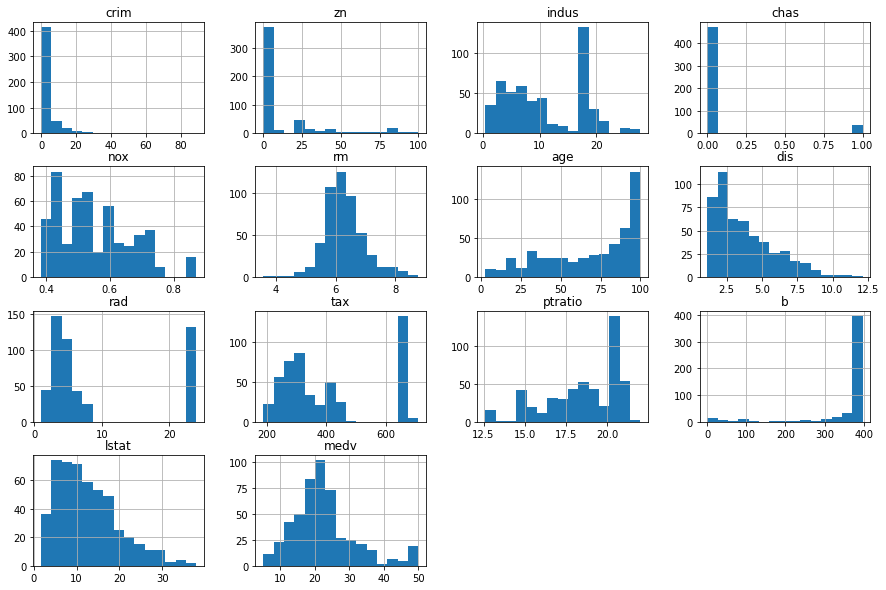

In [12]:
#设置绘图大小
plt.style.use({'figure.figsize':(15,10)})

#绘制直方图
df.hist(bins=15)

<AxesSubplot:>

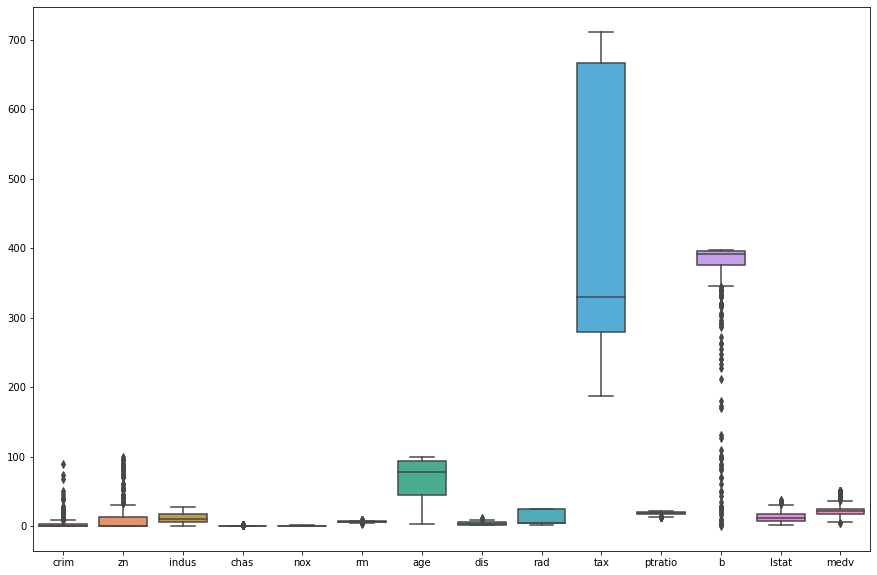

In [13]:
#绘制箱线图
sns.boxplot(data=df)

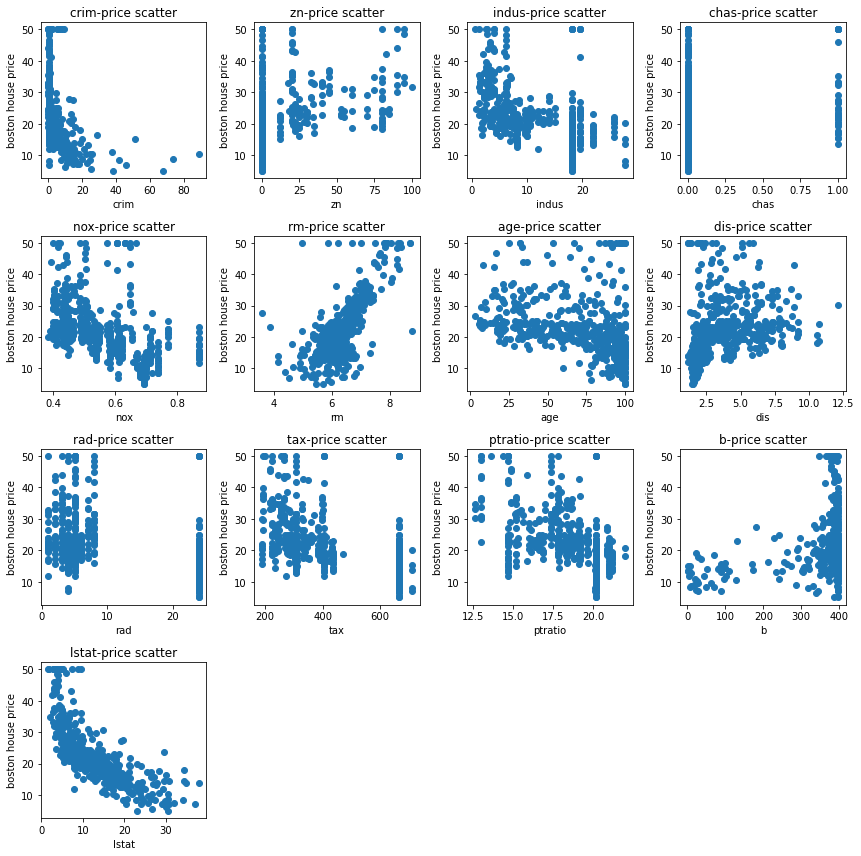

In [14]:
#绘制散点图
plt.figure(figsize=(12,12))
for i in range(13):
    plt.subplot(4,4,(i+1))
    plt.scatter(df.iloc[:,i],df['medv'])
    plt.title('{}-price scatter'.format(df.columns[i]))
    plt.xlabel(df.columns[i])
    plt.ylabel('boston house price')

plt.tight_layout()